<a href="https://colab.research.google.com/github/StephenMartino4/Computational-Physics/blob/main/Stephen_Martino_Lab05_Part2_SHM_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5, Part 2: Modeling Simple Harmonic Motion with the Euler Method
*Written by Rose Finn*

*Adapted from Giordano & Nakanishi, Chapter 3*

In [ ]:
# import numpy and pyplot
from matplotlib import pyplot as plt
import numpy as np

## Write a Function to calculate acceleration

(5 points)

Write a function called **acceleration** that does the following:
* Input
  * spring constant, $k$
  * mass, $m$
  * displacement from equilibrium, $dx$

* The function should calculate the acceleration using Hooke's law.  Make sure you correctly account for the direction of the force!

* The function should return acceleration

In [ ]:
# acceleration function here
# write the multi-line comment at the beginning
def acceleration(k,m,dx):
  """
  description:
  This function calculates the acceleration using hooke's law
  parameters:
  k (spring constant), m (mass), dx (change in x)
  return:
  acceleration
  """
  # your code here
  a = (-k/m)*dx
  return a

## Write function to create and initialize position and velocity arrays

(5 points)

Write a function called **initialize** that does the following.
* Input
  * initial position, $x_0$
  * initial velocity, $v_0$
  * total time, $tmax$
  * time step, $dt$

* The function should:
  *  calculate the number of time steps
  ```
  nsteps = int(tmax/dt)
  ```
  * create the time, position and velocity arrays using `np.zeros`
  * set the first value of the position array to $x_0$
  * set the first value of the velocity array to $v_0$

* The function should return
  * time array
  * position array
  * velocity array

In [ ]:
# write your initialize function
# be sure to include your multi-line comment string

def initialize(x0,v0,tmax,dt):
  """
  description:
  initializes arrays for time, pos, and vel
  parameters:
  x0 (initial pos), v0 (initial vel), tmax (max time), dt (time step)
  return:
  time, position, and velocity arrays
  """
  nsteps = int(tmax/dt)
  time = np.zeros(nsteps)
  position = np.zeros(nsteps)
  velocity = np.zeros(nsteps)
  position[0] = x0
  velocity[0] = v0
  return time, position, velocity

## Write function to calculate Euler

(5 points)

Write a function called **calculate** that does the following.
* Input
  * time array
  * position array
  * velocity array
  * spring constant, $k$
  * mass, $m$
  * time step, dt

* Optional input argument
  * equilibrium position, $xeq$.  
  * Set the default value to zero.

* The function should calculate the position and velocity as a function of time using the Euler method.

* Return
  * time array
  * position array
  * velocity array

In [ ]:
# write your calculate function here
def calculate(time,pos,vel,A,k,m,dt):
  """
  description:
  calculates using euler the time, pos, and vel arrays
  parameters:
  time, pos, vel, A (amplitude), k (spring constant), m (mass), dt (time step)
  return:
  time, pos, and vel arrays
  """
  omega = np.sqrt(k/m)
  phi = 0.35
  for i in range(1,len(time)):
    vel[i] = vel[i-1]+acceleration(k,m,pos[i-1])*dt
    pos[i] = pos[i-1]+vel[i-1]*dt
    time[i] = time[i-1]+dt
  # your code here
  return time, pos, vel

In [ ]:
#from part 1
def calculate_position(A,omega,phi,time):
  position = A*np.cos(omega*time-phi)
  return position

## Write your main program

(5 points)

Follow the instructions in the cell below to model the motion of a mass on a spring.


4.83321946706122


Text(0, 0.5, 'Position(m)')

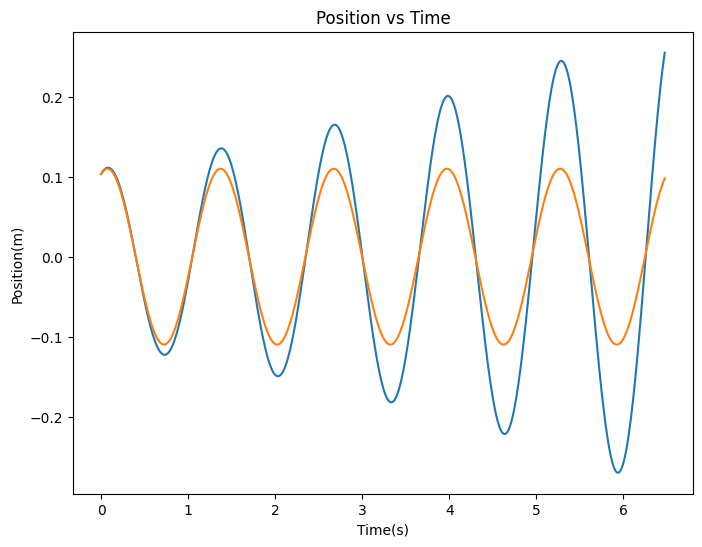

In [ ]:
# define the values for the initial position and velocity
# use the values you determined from Part 1
x0 = 0.10333099841321168
vx0 = 0.1823030394026927

# set the amplitude, mass and spring constant to the values from Part 1
A = 0.11
m = 0.1
k = 2.3360010416779544
phi = 0.35
# Enter the period you determined from Part 1
T = 1.3
# set the time step to a small fraction of the period
dt = T/100

# set tmax to 5x the period
tmax = T*5


# call initialize
t, pos, vel = initialize(x0,vx0,tmax,dt)


# call calculate
time, position, velocity = calculate(t, pos, vel, A, k, m, dt)

# plot position versus time
# set the figure size to (8,6)
plt.figure(figsize = (8,6))
plt.plot(time, position)



# overplot your analytic solution from Part 1
omega = (2*np.pi)/T
print(omega)
analytical = calculate_position(A,omega,phi,time)
plt.plot(time,analytical)
plt.title("Position vs Time")
plt.xlabel("Time(s)")
plt.ylabel("Position(m)")

# Conservation of Energy

(5 points)


The total mechanical energy of a mass oscillating on a spring is:

$$ E = KE + PE  $$

For a one-dimensional oscillator that is moving only in the x direction, the total energy is:

$$ E = \frac{1}{2}m v_x^2 + \frac{1}{2} k x^2 $$

Make a plot of total energy vs time for your Euler solution.

**Questions**

Briefly answer the following questions in your wiki summary.
1. Does your Euler solution conserve energy?  
1. Is the Euler method a good approach for modeling oscillatory motion?

Text(0.5, 0, 'Time(s)')

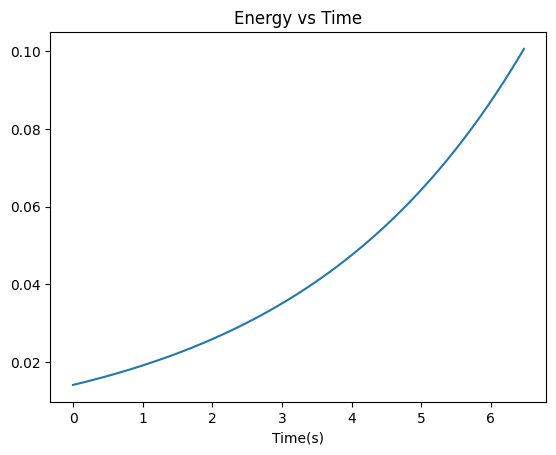

In [ ]:
# Your plot of energy vs time here
E = 0.5*m*vel**2+0.5*k*pos**2
plt.plot(time,E)
plt.title("Energy vs Time")
plt.xlabel("Time(s)")

# Euler-Cromer Solution

* Copy your calculate function below, but call it `euler_cromer_calculate`
* Adjust the code so that the $\omega_{i+1}$ is used to calculate $\theta_{i+1}$.
* Replot the position vs time.
* Replot total energy vs time.


**Questions**

Briefly answer the following questions in your wiki summary.
1. What is different about the Euler vs Euler-Cromer method?
1. Does the Euler-Cromer solution conserve energy?

In [ ]:
# your euler_cromer_calculate
def euler_cromer_calculate(time,pos,vel,A,k,m,dt):
  """
  description:
  calculates using euler-cromer the time, pos, and vel arrays
  parameters:
  time, pos, vel, A (amplitude), k (spring constant), m (mass), dt (time step)
  return:
  time, pos, and vel arrays
  """
  for i in range(1,len(time)):
    vel[i] = vel[i-1]+acceleration(k,m,pos[i-1])*dt
    pos[i] = pos[i-1]+vel[i]*dt
    time[i] = time[i-1]+dt
  return time, pos, vel

4.83321946706122


Text(0, 0.5, 'Position(m)')

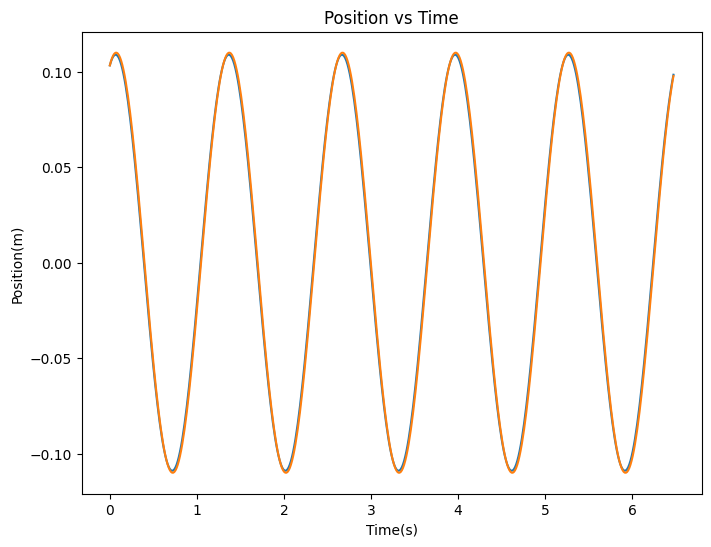

In [ ]:
# copy your main function cell from above
# call euler_cromer_calculate instead of calculate
# define the values for the initial position and velocity
# use the values you determined from Part 1
x0 = 0.10333099841321168
vx0 = 0.1823030394026927

# set the amplitude, mass and spring constant to the values from Part 1
A = 0.11
m = 0.1
k = 2.3360010416779544
phi = 0.35
# Enter the period you determined from Part 1
T = 1.3
# set the time step to a small fraction of the period
dt = T/100

# set tmax to 5x the period
tmax = T*5

# call initialize
t, pos, vel = initialize(x0,vx0,tmax,dt)

# call calculate
time, position, velocity = euler_cromer_calculate(t, pos, vel, A, k, m, dt)

# plot position versus time
# set the figure size to (8,6)
plt.figure(figsize = (8,6))
plt.plot(time, position)

# overplot your analytic solution from Part 1
omega = (2*np.pi)/T
print(omega)
analytical = calculate_position(A,omega,phi,time)
plt.plot(time,analytical)
plt.title("Position vs Time")
plt.xlabel("Time(s)")
plt.ylabel("Position(m)")

(-1.0, 1.0)

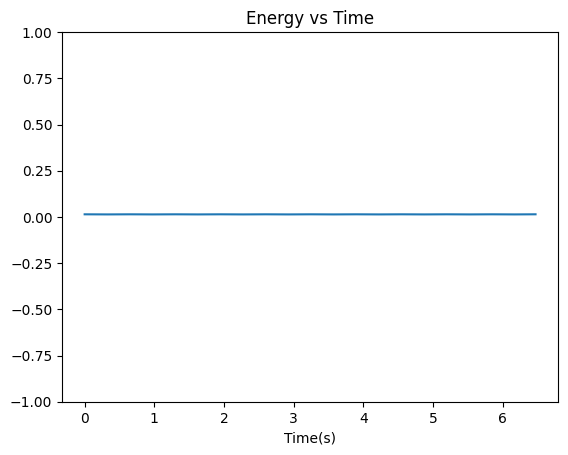

In [ ]:
# copy your total energy vs time plot from above
# but plot the output from the Euler-Cromer solution here
E = 0.5*m*vel**2+0.5*k*pos**2
plt.plot(time,E)
plt.title("Energy vs Time")
plt.xlabel("Time(s)")
plt.ylim(-1,1)
